# Real Data

Load the Housing_Price.csv and see the feature_discription.txt for more insight (However you don't need to remove any unneccesary feature just use encoding to convert the categorical features)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# load data
pd.set_option('display.max_columns', 90)
data=pd.read_csv('Housing_Price.csv')
data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Street,Condition1,Condition2,CentralAir,HeatingQC,LotShape,LandContour
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,Pave,Norm,Norm,Y,Ex,Reg,Lvl
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,Pave,Feedr,Norm,Y,Ex,Reg,Lvl
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,Pave,Norm,Norm,Y,Ex,IR1,Lvl
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,Pave,Norm,Norm,Y,Gd,IR1,Lvl
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,Pave,Norm,Norm,Y,Ex,IR1,Lvl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000,Pave,Norm,Norm,Y,Ex,Reg,Lvl
1456,1457,20,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000,Pave,Norm,Norm,Y,TA,Reg,Lvl
1457,1458,70,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500,Pave,Norm,Norm,Y,Ex,Reg,Lvl
1458,1459,20,9717,5,6,1950,1996,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010,142125,Pave,Norm,Norm,Y,Gd,Reg,Lvl


which are categorical and which are numerical features?

### Ans:
#### Categorical Features are:
MSSubClass, OverallQual, OverallCond, MoSold, Condition1, Condition2, Street, CentralAir, HeatingQC, LotShape, LandContour.

#### Numerical Features are:
MSSubClass, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtUnfSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr,  KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice.

In [3]:
# you can print and analyse the data type to say about categorical features
data.dtypes

Id                int64
MSSubClass        int64
LotArea           int64
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageCars        int64
GarageArea        int64
WoodDeckSF        int64
OpenPorchSF       int64
EnclosedPorch     int64
3SsnPorch         int64
ScreenPorch       int64
PoolArea          int64
MiscVal           int64
MoSold            int64
YrSold            int64
SalePrice         int64
Street           object
Condition1       object
Condition2       object
CentralAir       object
HeatingQC        object
LotShape         object
LandContour     

Write a function for doing one hot encoding for all categorical features

Hint: Use pandas.get_dummies

In [4]:

def onehot_encoding(df,columns):
    '''
    Takes the dataframe 
    columns which are corresponding to categorical features
    '''
    df = pd.get_dummies(data=df, columns=columns) 
    
    return df

Seperate the Label from the data, here it is 'SalePrice'

In [5]:
# Write your code here
label_cols=["OverallQual", "OverallCond", "Street", "Condition1", "Condition2", "CentralAir", 
              "HeatingQC", "LotShape", "LandContour"]
nominal_cols=["MSSubClass", "MoSold", "YearBuilt", "YearRemodAdd", "YrSold"]
le=LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])
data=onehot_encoding(data,nominal_cols)
X=data.drop(columns=['SalePrice','Id'],axis=1)
y=data['SalePrice']

In [6]:
# Visualize the changed dataframe
data

,Id,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Street,Condition1,Condition2,CentralAir,HeatingQC,LotShape,LandContour,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,...,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1983,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1986,YearRemodAdd_1987,YearRemodAdd_1988,YearRemodAdd_1989,YearRemodAdd_1990,YearRemodAdd_1991,YearRemodAdd_1992,YearRemodAdd_1993,YearRemodAdd_1994,YearRemodAdd_1995,YearRemodAdd_1996,YearRemodAdd_1997,YearRemodAdd_1998,YearRemodAdd_1999,YearRemodAdd_2000,YearRemodAdd_2001,YearRemodAdd_2002,YearRemodAdd_2003,YearRemodAdd_2004,YearRemodAdd_2005,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,1,8450,6,4,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,1,2,2,1,0,3,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2,9600,5,7,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,1,1,2,1,0,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,11250,6,4,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,1,2,2,1,0,0,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,9550,6,4,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,1,2,2,1,2,0,3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,14260,7,4,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,1,2,2,1,0,0,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,5,4,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,175000,1,2,2,1,0,3,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1456,1457,13175,5,5,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,210000,1,2,2,1,4,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1457,1458,9042,6,8,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,266500,1,2,2,1,0,3,3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1458,1459,9717,4,5,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,142125,1,2,2,1,2,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Split train test split with random state 42, test size 0.2

You can use sklearn module for this exercise

In [7]:
# Split data here 
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# import your Libraries
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
import matplotlib.pyplot as plt

## Lasso Regression

1. search for alphas in range of 0.1 to 1000 for Lasso rigression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE  

Hint:   
- cross validation score gives accuracy not the error convert to error appropriately (otherwise choose lambda which maximizes the score)


In the following cell, use training which was split earlier to cross validate (using cross_val_score) use cv = 5 (5 folds), then calculate the mean of the cross validation score for each alphas and plot $\lambda$ vs cross_valiadtion_score  or cross_validation_error. If you choose the accuracy then choose the $\lambda$ which maximizes the cross_val_score. 

For range of alphas use  alphas = np.logspace(-1, 3, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)

Optimal lambda for LASSO regression: 298.3647
Log Mean squared error at optimal lambda: 21.1488


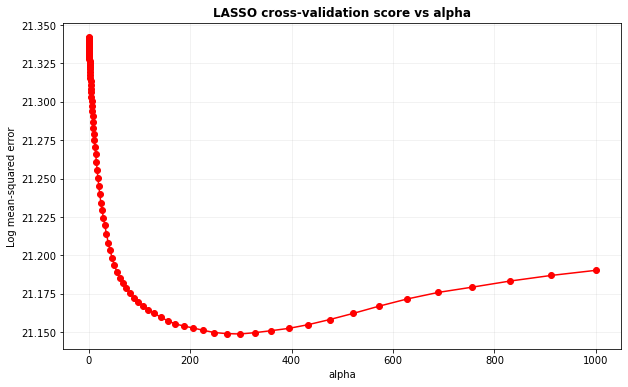

In [9]:
# write your code here and plot lambda vs cross validation score
alphas=np.logspace(-1,3,100)
val_scores=[]

for alpha in alphas:
    model=Lasso(alpha)
    scores=cross_val_score(model,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
    val_scores.append(-np.mean(scores))

    
optimum_lasso_lambda = alphas[np.argmin(val_scores)]
print("Optimal lambda for LASSO regression: {:.4f}".format(optimum_lasso_lambda))
print("Log Mean squared error at optimal lambda: {:.4f}".format(min(np.log(val_scores))))

plt.figure(figsize=(10, 6))
plt.plot(alphas, np.log(val_scores), marker='o', color='red')
plt.title("LASSO cross-validation score vs alpha", fontweight='bold')
plt.xlabel("alpha")
plt.ylabel("Log mean-squared error")
plt.grid(alpha=0.2)
plt.show()

## Ridge Regression

1. search for alphas in range of 0.1 to 100 for Ridge rigression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE


This similar to as explained for Lasso regression. Again plot $\lambda$ vs accuracy (or error) 

For range of alphas use  alphas = np.logspace(-1, 2, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)


Optima lambda for ridge-regression: 37.6494
Log MSE at optimal lambda: 21.1424


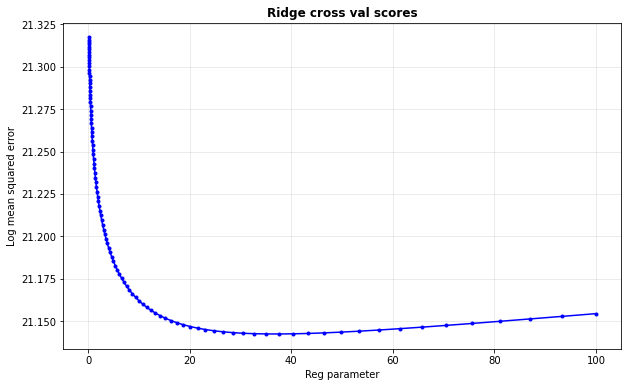

In [10]:
# write your code here and plot lambda vs cross validation score
alphas = np.logspace(-1, 2, 100)
val_scores = []

for alpha in alphas:
    model = Ridge(alpha)
    score = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    val_scores.append(-np.mean(score))

optimum_ridge_lambda = alphas[np.argmin(val_scores)]
print("Optima lambda for ridge-regression: {:.4f}".format(optimum_ridge_lambda))
print("Log MSE at optimal lambda: {:.4f}".format(min(np.log(val_scores))))

plt.figure(figsize=(10, 6))
plt.plot(alphas, np.log(val_scores), marker='.', color='blue')
plt.xlabel("Reg parameter")
plt.ylabel("Log mean squared error")
plt.title("Ridge cross val scores", fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

Now compare regularized models to linear Regression model

In the following cell, calculate cross validation score using Linear Regression model

In [11]:
# write your code here print cross validation score
model = LinearRegression()
score = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
mean_val_score = -np.mean(score)
print("Log MSE for linear regression: {:.4f}".format(np.log(mean_val_score)))

Log MSE for linear regression: 39.8636


Now you have $\lambda$ values for both ridge and lasso regression, predict the model on the test data you created earlier

In the following cell use selected $\lambda$ as the model parameter, predict on test data, compare among three models and report your findings. 




Finally use lasso regression to find the important features and write your observations and also what do you observe when you compare both coefficients of Ridge and Lasso ? Do you see any property of Lasso which is used?
 
Hint: 
- Check weights corresponding to each features


Note:
- Don't worry if you have huge error in prediction, it is possible, just compare among models and report which has lease error.


In [12]:
# predict on test data which you  splitted earlier, print coefficients of the learned model, Mean square error. Report the model which gives the least MSE. Also commenton important features
lasso_model=Lasso(optimum_lasso_lambda)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Log-MSE for LASSO rgression model: {:.8f}".format(np.log(lasso_mse)))

ridge_model=Ridge(optimum_ridge_lambda)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Log-MSE for Ridge regression model: {:.8f}".format(np.log(ridge_mse)))

linear_model=LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
print("Log-MSE for linear model: {:.8f}".format(np.log(linear_mse)))

Log-MSE for LASSO rgression model: 21.06386580
Log-MSE for Ridge regression model: 21.02046080
Log-MSE for linear model: 32.28591591


By observing the perfomance of the three models on test data the best model is obtained using the Ridge regression.

# Feature importance

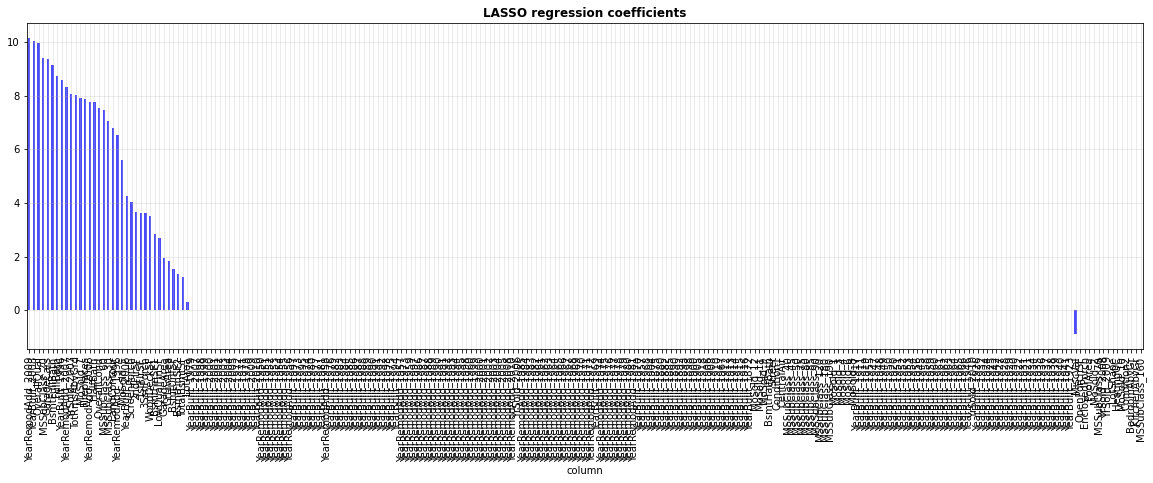

In [17]:
# Lasso regression coefficients

columns = X.columns
coefs = lasso_model.coef_
df = pd.DataFrame(np.vstack(( columns, coefs )).T, columns={"column", "coef"})
df.set_index("column", inplace=True)
df.sort_values(by='coef', ascending=False, inplace=True)

plt.figure(figsize=(20, 6))
df["coef"].apply(lambda x: np.log(x+1)).plot(kind='bar', color='blue', alpha=0.7)
plt.grid(alpha=0.3)
plt.title("LASSO regression coefficients", fontweight='bold')
plt.show()

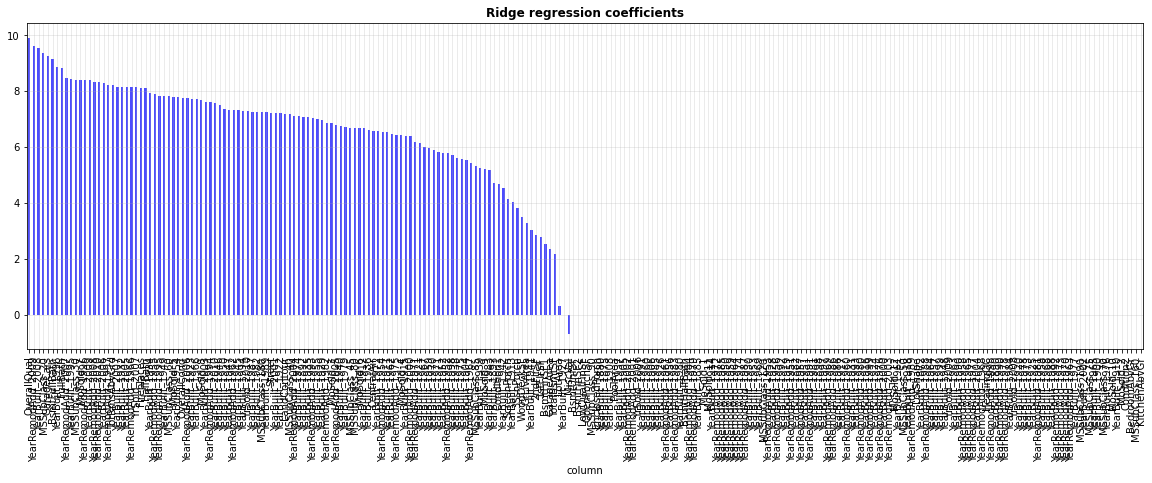

In [15]:
# Ridge regression coefficients

columns = X.columns
coefs = ridge_model.coef_
df = pd.DataFrame(np.vstack(( columns, coefs )).T, columns={"column", "coef"})
df.set_index("column", inplace=True)
df.sort_values(by='coef', ascending=False, inplace=True)

plt.figure(figsize=(20, 6))
df["coef"].apply(lambda x: np.log(x+1)).plot(kind='bar', color='blue', alpha=0.7)
plt.grid(alpha=0.3)
plt.title("Ridge regression coefficients", fontweight='bold')
plt.show()